### Normalization - Min-Max Scaling

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
X = df[['Glucose', 'BMI']].values
y = df['Outcome'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
min_max = MinMaxScaler()

In [13]:
X_train_scaled = min_max.fit_transform(X_train)

In [14]:
X_train_scaled

array([[0.47738693, 0.3561848 ],
       [0.52763819, 0.54992548],
       [0.67839196, 0.63040238],
       ...,
       [0.50753769, 0.67958271],
       [0.70854271, 0.6318927 ],
       [0.6281407 , 0.33532042]])

In [15]:
X_scaled = min_max.transform(X)

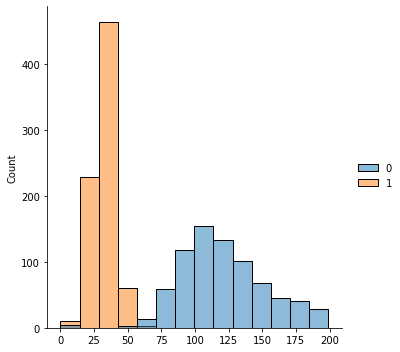

In [16]:
import seaborn as sns
sns.displot(X)

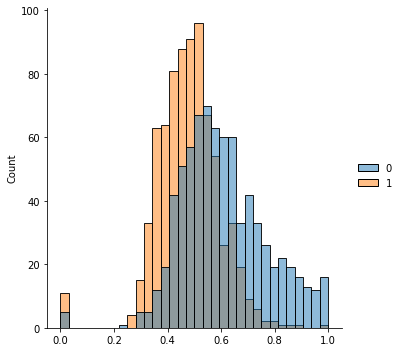

In [17]:
sns.displot(X_scaled)

## Standardization


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
std = StandardScaler()

In [24]:
X_scaled = std.fit_transform(X)
X_test_scaled = std.transform(X_test)

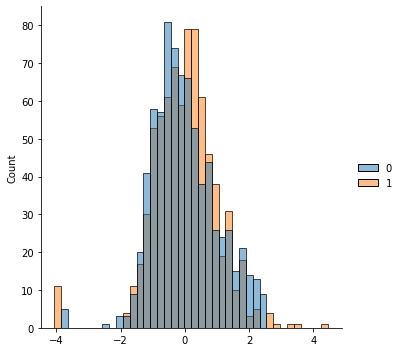

In [25]:
sns.displot(X_scaled)

## Dummy variable

In [26]:
df_dummies = pd.read_csv('Heart.csv')

In [27]:
df_dummies

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [28]:
new_df = pd.get_dummies(df_dummies, columns=['AHD'], drop_first = True)

In [29]:
new_df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD_Yes
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [33]:
new_df = pd.get_dummies(df_dummies, columns=['Thal'], drop_first = True)

In [34]:
new_df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,Thal_normal,Thal_reversable
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,No,0,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,Yes,1,0
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,Yes,0,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,No,1,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,No,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,Yes,0,1
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,Yes,0,1
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,Yes,0,1
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,Yes,1,0


## Box-Cox Transformer

In [35]:
X = df.iloc[:,:8].values
y = df['Outcome'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [37]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\users\pulbe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_pred, y_test)

0.2597402597402597

In [39]:
from imperio import BoxCoxTransformer

In [40]:
boxcox = BoxCoxTransformer()
boxcox.fit(X_train, y_train)

BoxCoxTransformer()

In [41]:
X_train_transformed = boxcox.transform(X_train)
X_test_transformed = boxcox.transform(X_test)

In [42]:
X_transformed = boxcox.transform(X)

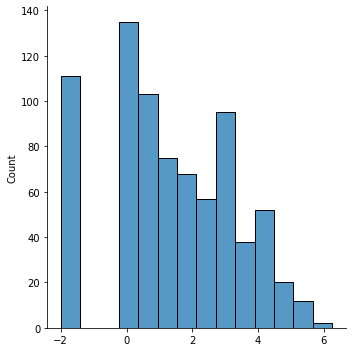

In [43]:
sns.displot(X_transformed[:,0])

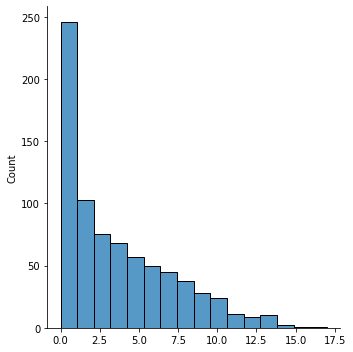

In [44]:
sns.displot(X[:,0])

In [45]:
model_transformed = LogisticRegression()
model_transformed.fit(X_train_transformed, y_train)
y_pred_transformed = model_transformed.predict(X_test_transformed)

In [46]:
from sklearn.metrics import accuracy_score
mean_absolute_error(y_pred_transformed, y_test)

0.2554112554112554

In [47]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('boxcox', BoxCoxTransformer()), ('model', LogisticRegression())])

In [48]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('boxcox', BoxCoxTransformer()),
                ('model', LogisticRegression())])

In [49]:
mean_absolute_error(pipe.predict(X_test), y_test)

0.2554112554112554

## ZCA Transformation - Zero component analysis

In [50]:
from imperio import ZCATransformer

In [51]:
zca = ZCATransformer()
zca.fit(X_train, y_train)
X_transformed = zca.transform(X_test)
transformed = zca.transform(X_test)

In [52]:
pipe = Pipeline([('zca', ZCATransformer()), ('model', LogisticRegression())])

In [53]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('zca', ZCATransformer()), ('model', LogisticRegression())])

In [54]:
mean_absolute_error(pipe.predict(X_test), y_test)

0.3333333333333333

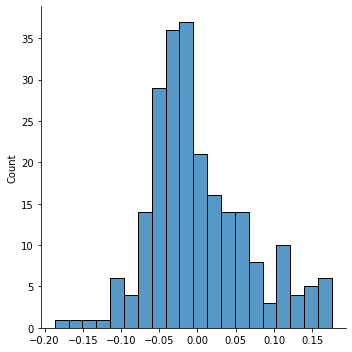

In [55]:
import seaborn as sns
sns.displot(transformed[:, 0], bins=20)

## Frequency Imputation

In [573]:
df = pd.read_csv('Heart.csv')

In [574]:
df = pd.get_dummies(df, columns=['AHD'], drop_first = True)

In [575]:
df['Thal'].value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [576]:
df['ChestPain'] = df['ChestPain'].map({'asymptomatic' : 1, 'nonanginal' : 2, 'nontypical' : 3, 'typical' : 4})

In [577]:
df['Thal'] = df['Thal'].map({'normal' : 1, 'reversable' : 2, 'fixed' : 3})

In [578]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [579]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD_Yes      0
dtype: int64

In [580]:
df = df.dropna()

In [451]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD_Yes
0,63,1,4,145,233,1,2,150,0,2.3,3,0.0,3.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2.0,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,1,140,241,0,0,123,1,0.2,2,0.0,2.0,1
298,45,1,4,110,264,0,0,132,0,1.2,2,0.0,2.0,1
299,68,1,1,144,193,1,0,141,0,3.4,2,2.0,2.0,1
300,57,1,1,130,131,0,0,115,1,1.2,2,1.0,2.0,1


In [581]:
X = df.iloc[:, 0:13].values
y = df['AHD_Yes'].values

In [582]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [583]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [584]:
mean_absolute_error(y_pred, y_test)

14.266666666666667

In [585]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD_Yes
0,63,1,4,145,233,1,2,150,0,2.3,3,0.0,3.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2.0,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,1,140,241,0,0,123,1,0.2,2,0.0,2.0,1
298,45,1,4,110,264,0,0,132,0,1.2,2,0.0,2.0,1
299,68,1,1,144,193,1,0,141,0,3.4,2,2.0,2.0,1
300,57,1,1,130,131,0,0,115,1,1.2,2,1.0,2.0,1


In [586]:
from imperio import FrequencyImputationTransformer
freq = FrequencyImputationTransformer()

In [587]:
new_df = freq.apply(df,target = 'AHD_Yes', columns = ['ChestPain', 'Thal'] )

In [588]:
new_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD_Yes
0,63.0,1.0,0.077441,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,0.060606,0
1,67.0,1.0,0.478114,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,0.552189,1
2,67.0,1.0,0.478114,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,0.387205,1
3,37.0,1.0,0.279461,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0.552189,0
4,41.0,0.0,0.164983,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0.552189,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,0.478114,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,0.387205,1
298,45.0,1.0,0.077441,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,0.387205,1
299,68.0,1.0,0.478114,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,0.387205,1
300,57.0,1.0,0.478114,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,0.387205,1


In [589]:
X = new_df.iloc[:, 0:13].values
y = new_df['AHD_Yes'].values

In [590]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [591]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [592]:
mean_absolute_error(y_pred, y_test)

11.488888888888889

### Target Imputation

In [593]:
from imperio import TargetImputationTransformer
target = TargetImputationTransformer()

In [594]:
new_df = target.apply(df,target = 'AHD_Yes', columns = ['ChestPain', 'Thal'] )

In [595]:
new_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD_Yes
0,63.0,1.0,0.304348,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,0.666667,0
1,67.0,1.0,0.725352,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,0.225610,1
2,67.0,1.0,0.725352,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,0.765217,1
3,37.0,1.0,0.216867,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0.225610,0
4,41.0,0.0,0.183673,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0.225610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,0.725352,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,0.765217,1
298,45.0,1.0,0.304348,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,0.765217,1
299,68.0,1.0,0.725352,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,0.765217,1
300,57.0,1.0,0.725352,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,0.765217,1


In [596]:
X = new_df.iloc[:, 0:13].values
y = new_df['AHD_Yes'].values

In [597]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [598]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [599]:
mean_absolute_error(y_pred, y_test)

8.588888888888889